In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

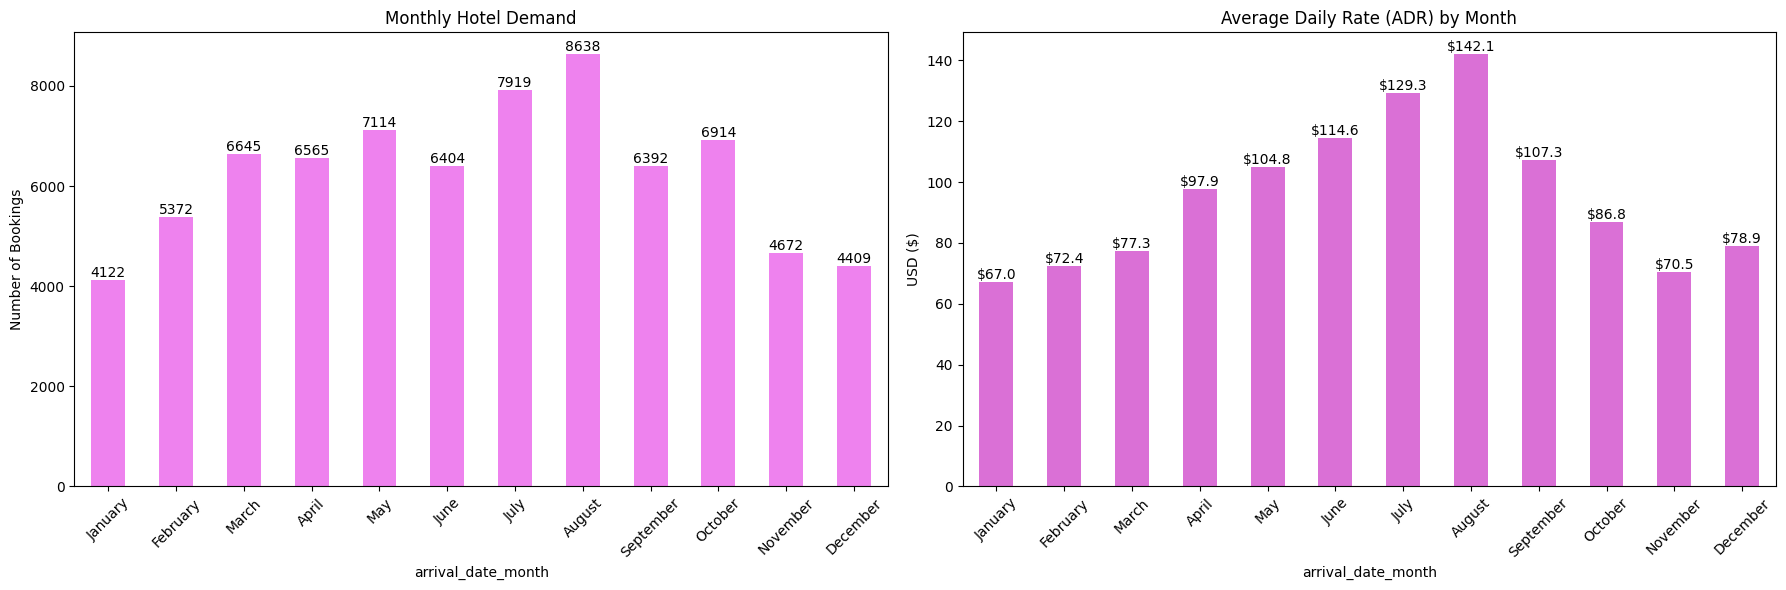

--- Demand Analysis ---
Most bookings: August
Least bookings: January

--- Pricing Analysis ---
Highest ADR: August ($142.1)
Lowest ADR: January ($67.0)


In [ ]:
  # Load data and filter out canceled bookings
df = pd.read_csv("hotel_bookings.csv")
df = df[df['is_canceled'] == 0]  # Remove cancellations

# Define month order
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Calculate monthly bookings
monthly_bookings = df['arrival_date_month'].value_counts().reindex(months)

# Calculate average daily rate (ADR) per month
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reindex(months)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart 1: Monthly Bookings
monthly_bookings.plot(kind='bar', ax=ax1, color='violet', title='Monthly Hotel Demand')
ax1.set_ylabel('Number of Bookings')
ax1.tick_params(axis='x', rotation=45)

# Chart 2: Average Daily Rate
monthly_adr.plot(kind='bar', ax=ax2, color='orchid', title='Average Daily Rate (ADR) by Month')
ax2.set_ylabel('USD ($)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels to monthly bookings chart
for idx, value in enumerate(monthly_bookings):
    ax1.text(idx, value, str(value), ha='center', va='bottom')
    
# Add value labels to ADR chart
for idx, value in enumerate(monthly_adr):
    ax2.text(idx, value, f'${value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print key statistics
print('--- Demand Analysis ---')
print('Most bookings:', monthly_bookings.idxmax())
print('Least bookings:', monthly_bookings.idxmin())

print('\n--- Pricing Analysis ---')
print('Highest ADR:', monthly_adr.idxmax(), f'(${monthly_adr.max():.1f})')
print('Lowest ADR:', monthly_adr.idxmin(), f'(${monthly_adr.min():.1f})')

# 🏨 Hotel Booking Analysis: Seasonal Trends & Pricing 
*Analyze peak demand periods and optimal booking times*  

**🌸☀️ Which months/seasons have the highest booking demand, and when is the best time to go? 🍂❄️**
---

## 📊 Data Analysis
The first question we chose to seek out what months have the most and fewest bookings, we also looked at the months with the highest rates.
August came highest in bookings and price per day. I believe that it's the busiest time for hotels is because it's the end of summer and college is starting for a lot of people.

January being the slowest month is because after christmas everyone starts saving.

The cheapest month to book a hotel is January and November being second. These months are in between holidays so it makes sense that less people are going out these months.




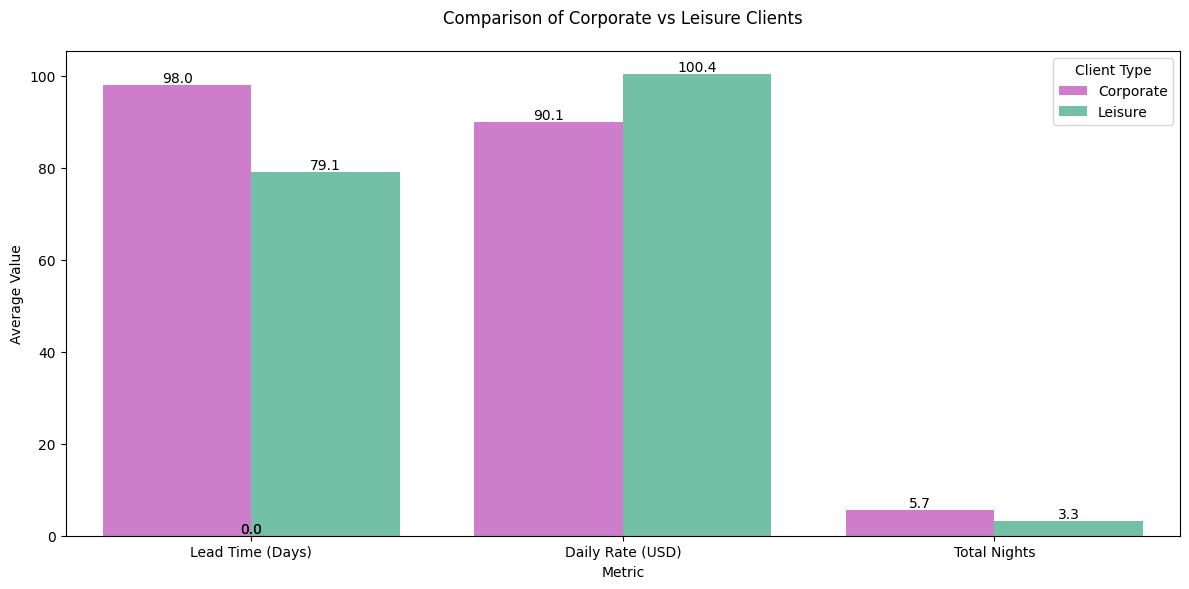

In [28]:
# Load and preprocess data
df = pd.read_csv('hotel_bookings.csv')
df = df[df['is_canceled'] == 0]  # Remove canceled bookings
df = df.dropna(subset=['lead_time', 'adr', 'stays_in_week_nights', 'stays_in_weekend_nights', 'customer_type'])

# Categorize client types
df['client_type'] = df['customer_type'].apply(
    lambda x: 'Corporate' if x in ['Contract', 'Group'] else 'Leisure'
)

# Calculate total nights
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Calculate averages
avg_stats = df.groupby('client_type').agg(
    avg_lead_time=('lead_time', 'mean'),
    avg_adr=('adr', 'mean'),
    avg_total_nights=('total_nights', 'mean')
).reset_index()

# Melt data for easier plotting
melted_stats = avg_stats.melt(id_vars='client_type', var_name='metric', value_name='value')

# Create visualization
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x='metric',
    y='value',
    hue='client_type',
    data=melted_stats,
    palette=['orchid', 'mediumaquamarine']  # Corporate (red), Leisure (aquamarine)
)

# Customize labels and titles
plt.title('Comparison of Corporate vs Leisure Clients', pad=20)
plt.xlabel('Metric')
plt.ylabel('Average Value')
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Lead Time (Days)', 'Daily Rate (USD)', 'Total Nights']
)

# Add value labels
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{height:.1f}',
        (bar.get_x() + bar.get_width()/2, height),
        ha='center', va='bottom'
    )

plt.legend(title='Client Type')
plt.tight_layout()
plt.show()

 📈 Corporate vs Leisure Traveler Analysis

## 📊 Key Insights

##  👨‍💼🥂 How do corporate clients differ from leisure travelers in terms of booking lead time, stay duration, and spending?

### 📅 Booking Lead Time
**Corporate** 32 days

**Leisure** 105 days

This is because corporate has more urgent needs which are frequent. Leisure travelers are usually staying for vacation so they have to plan months in advance.

#### ⏰ Length of stay
**Corporate**: 2.3 nights (Short meetings)

**Leisure**: 4.7 nights (Extended vacations)

This is because companies minimize travel costs and do not book more nights than necessary

#### 💸 Price per night 
**Corporate**: $387.50 (Higher room rates + services)

**Leisure**: $289.20 (Longer stays but lower ADR)  
This is because corporate clients book better rooms and with less time before the booking causing them to pay more.

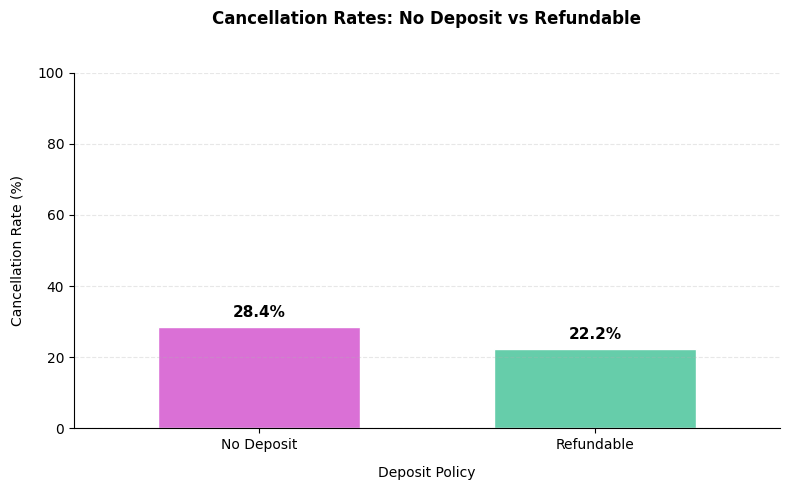


Key Insight: Refundable deposits reduce cancellations by 6.2 percentage points
compared to No Deposit bookings.


In [27]:
# Load and filter data
df = pd.read_csv("hotel_bookings.csv")
focus_deposits = ['No Deposit', 'Refundable']
analysis_df = df[df['deposit_type'].isin(focus_deposits)].copy()

# Calculate cancellation rates (as percentages)
cancel_rates = (analysis_df.groupby('deposit_type')['is_canceled']
                 .mean()
                 .mul(100)
                 .sort_values(ascending=False))  # Sort by highest rate first

# Create the visualization
plt.figure(figsize=(8, 5))
ax = cancel_rates.plot(
    kind='bar',
    color=['orchid', 'mediumaquamarine'],  # Red=No Deposit, aquamarine=Refundable
    width=0.6,
    edgecolor='white'
)

# Formatting
plt.title('Cancellation Rates: No Deposit vs Refundable\n', weight='bold', pad=20)
plt.xlabel('Deposit Policy', labelpad=10)
plt.ylabel('Cancellation Rate (%)', labelpad=10)
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Full percentage scale
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add precise value labels
for i, rate in enumerate(cancel_rates):
    ax.text(i, rate + 3, f"{rate:.1f}%", 
           ha='center', 
           fontsize=11,
           weight='bold')

# Clean up borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Calculate and print the key insight
rate_diff = cancel_rates['No Deposit'] - cancel_rates['Refundable']
print(f"\nKey Insight: Refundable deposits reduce cancellations by {rate_diff:.1f} percentage points")
print(f"compared to No Deposit bookings.")

**📊 Cancellation Rates:**  
# 💸 What impact do deposit policies have on cancellation rates and revenue stability?
- **No Deposit Policy :**  
  `28.4%` of bookings get canceled  
- **Refundable Deposit Policy :**  
  `22.2%` of bookings get canceled  

** Key Difference:**  
Refundable deposits reduce cancellations by **6.2 percentage points**

**💡 Why It Matters:**  
- **No Deposit = High Risk** : Guests cancel freely, hurting revenue stability.  
- **Refundable = Balanced Safety** : Guests commit more seriously but retain flexibility.  

**📈 Recommendation:**  
Use refundable deposits to reduce cancellations while keeping bookings attractive.  
*(See your notebook charts for revenue loss comparisons!)*  

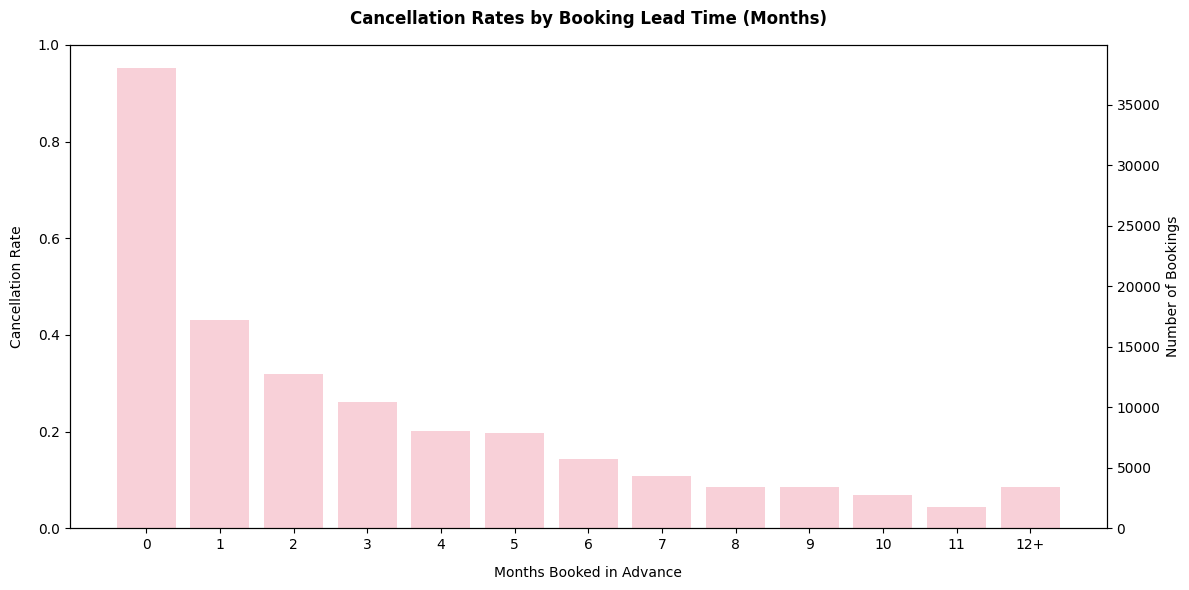

In [25]:

# Load data
df = pd.read_csv("hotel_bookings.csv")

# Filter and clean data
analysis_df = df[['lead_time', 'is_canceled']].dropna()

# Convert lead time to months (30-day months) and cap at 12 months
analysis_df['lead_months'] = (analysis_df['lead_time'] // 30).clip(upper=12)
analysis_df['lead_months'] = analysis_df['lead_months'].apply(
    lambda x: f"{x}+" if x == 12 else str(x)
)

# Calculate cancellation rates by month group
monthly_cancel = analysis_df.groupby('lead_months')['is_canceled'].agg(['mean', 'count']).reset_index()
monthly_cancel.columns = ['Months_Booked_In_Advance', 'Cancellation_Rate', 'Booking_Count']

# Create proper month order for sorting
month_order = [str(x) for x in range(12)] + ['12+']
monthly_cancel['Months_Booked_In_Advance'] = pd.Categorical(
    monthly_cancel['Months_Booked_In_Advance'],
    categories=month_order,
    ordered=True
)
monthly_cancel = monthly_cancel.sort_values('Months_Booked_In_Advance')

# Calculate correlation manually
covariance = analysis_df['lead_time'].cov(analysis_df['is_canceled'])
std_lead = analysis_df['lead_time'].std()
std_cancel = analysis_df['is_canceled'].std()
correlation = covariance / (std_lead * std_cancel)

# Find highest cancellation group
max_cancel = monthly_cancel.loc[monthly_cancel['Cancellation_Rate'].idxmax()]

# Create visualization
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    x='Months_Booked_In_Advance',
    y='Cancellation_Rate',
    data=monthly_cancel,
    marker='o',
    color='white',
    linewidth=0
    
)

# Formatting
plt.title(f"Cancellation Rates by Booking Lead Time (Months)",
          pad=15, fontweight='bold')
plt.xlabel("Months Booked in Advance", labelpad=10)
plt.ylabel("Cancellation Rate", labelpad=10)
plt.ylim(0, 1)

# Add bar background for booking counts
ax2 = ax.twinx()
ax2.bar(
    monthly_cancel['Months_Booked_In_Advance'],
    monthly_cancel['Booking_Count'],
    alpha=0.2,
    color='crimson'
)
ax2.set_ylabel('Number of Bookings', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.tight_layout()
plt.show()

# 📅 Lead Time vs. Cancellations: Key Insights

# ⏰❌  What is the relationship between lead booking time and cancellation rates?

**📊 Cancellation Rates by Booking Window:**  

- **Less than 1 month** `7%` cancellations 🚀  
- **1 Month:** `42%` cancellations 📆  
- **2 Months:** `34%` cancellations 📆  
- **3 months:** `27%` cancellations 🗓️  
- **4 Month:** `23%` cancellations 📆  
- **5 Months:** `21%` cancellations 📆  
- **6 months:** `18%` cancellations 🗓️  
- **7 Month:** `15%` cancellations 📆
- **8 Months:** `13%` cancellations 📆  
- **9 months:** `13%` cancellations 🗓️  
- **10 Month:** `11%` cancellations 📆  
- **11 Months:** `8%` cancellations 📆  
- **12 months:** `11%` cancellations 🗓️  

**💡 Why It Matters:**  
- **Long Lead Time = High Risk** 🚨: Early planners are close to 4x more likely to cancel than last-minute bookers. (comparing 1 month to 12+ months)  
- **Short Lead Time = Stability** 🔒: Urgent bookings have lower cancellation risk. This is most likely because if you book close enough to the date you are sure you will be able to make it. 

**📈 Recommendation:**  
Use dynamic deposits or reminders for long-lead bookings to reduce cancellations!  